# SSENSE.COM Product EDA 

### As of 12/04/2019

In [1]:
import pandas as pd
import numpy as np
import pickle

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Data Loading & Formatting

In [2]:
pickle_in = open("all_products_desp_12042019.pickle","rb")
all_products_data = pickle.load(pickle_in)

In [3]:
all_products_df = pd.DataFrame.from_records(all_products_data, columns =['category','productID','brand','name',
                                                                         'SKU','price','currency','url',
                                                                         'image','description'])


all_products_df = all_products_df[['productID','SKU','category','brand',
                                   'name','description', 'price',
                                   'currency','url','image']]
all_products_df.head()

,productID,SKU,category,brand,name,description,price,currency,url,image
0,4607571,201677M138033,ACCESSORIES,Loewe,Blue William De Morgan Edition Dragon Beanie,"Wool and mohair-blend beanie in blue, black, a...",1500,CAD,/men/product/loewe/blue-william-de-morgan-edit...,https://res.cloudinary.com/ssenseweb/image/upl...
1,4534861,201607M131237,ACCESSORIES,Off-White,Black Mini Industrial Belt,Nylon-blend webbing belt in black. Tonal woven...,240,CAD,/men/product/off-white/black-mini-industrial-b...,https://res.cloudinary.com/ssenseweb/image/upl...
2,4534071,201607M164199,ACCESSORIES,Off-White,Black Quote Yen Wallet,Buffed leather wallet in black. Text printed i...,400,CAD,/men/product/off-white/black-quote-yen-wallet/...,https://res.cloudinary.com/ssenseweb/image/upl...
3,4534221,201607M149208,ACCESSORIES,Off-White,Black Quote Card Holder,Buffed leather card holder in black. Tonal bur...,265,CAD,/men/product/off-white/black-quote-card-holder...,https://res.cloudinary.com/ssenseweb/image/upl...
4,4534051,201607M162200,ACCESSORIES,Off-White,Black Quote Passport Holder,Buffed leather passport holder in black. Text ...,335,CAD,/men/product/off-white/black-quote-passport-ho...,https://res.cloudinary.com/ssenseweb/image/upl...


In [4]:
len(all_products_df)

30506

The last word of the name of a product is usually the sub-category that the product belongs to. Therefore, that could be a good proxy to assign sub-category to a product.

In [5]:
def last_word(string):
    str_list = string.split()
    return str_list[-1]

In [6]:
all_products_df['sub-category'] = all_products_df['name'].apply(last_word)

all_products_df = all_products_df[['productID','SKU','category','sub-category','brand',
                                   'name','description', 'price',
                                   'currency','url','image']]


all_products_df.head()

,productID,SKU,category,sub-category,brand,name,description,price,currency,url,image
0,4607571,201677M138033,ACCESSORIES,Beanie,Loewe,Blue William De Morgan Edition Dragon Beanie,"Wool and mohair-blend beanie in blue, black, a...",1500,CAD,/men/product/loewe/blue-william-de-morgan-edit...,https://res.cloudinary.com/ssenseweb/image/upl...
1,4534861,201607M131237,ACCESSORIES,Belt,Off-White,Black Mini Industrial Belt,Nylon-blend webbing belt in black. Tonal woven...,240,CAD,/men/product/off-white/black-mini-industrial-b...,https://res.cloudinary.com/ssenseweb/image/upl...
2,4534071,201607M164199,ACCESSORIES,Wallet,Off-White,Black Quote Yen Wallet,Buffed leather wallet in black. Text printed i...,400,CAD,/men/product/off-white/black-quote-yen-wallet/...,https://res.cloudinary.com/ssenseweb/image/upl...
3,4534221,201607M149208,ACCESSORIES,Holder,Off-White,Black Quote Card Holder,Buffed leather card holder in black. Tonal bur...,265,CAD,/men/product/off-white/black-quote-card-holder...,https://res.cloudinary.com/ssenseweb/image/upl...
4,4534051,201607M162200,ACCESSORIES,Holder,Off-White,Black Quote Passport Holder,Buffed leather passport holder in black. Text ...,335,CAD,/men/product/off-white/black-quote-passport-ho...,https://res.cloudinary.com/ssenseweb/image/upl...


In [7]:
all_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30506 entries, 0 to 30505
Data columns (total 11 columns):
productID       30506 non-null int64
SKU             30506 non-null object
category        30506 non-null object
sub-category    30506 non-null object
brand           30506 non-null object
name            30506 non-null object
description     30506 non-null object
price           30506 non-null int64
currency        30506 non-null object
url             30506 non-null object
image           30506 non-null object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB


## Basic Statistics & Visualization

In [8]:
#There are 4 unique categories in total

len(set(all_products_df['category']))

4

In [9]:
#There are 215 unique sub-categories in total

len(set(all_products_df['sub-category']))

215

In [10]:
#There are 443 unique brands in total

len(set(all_products_df['brand']))

443

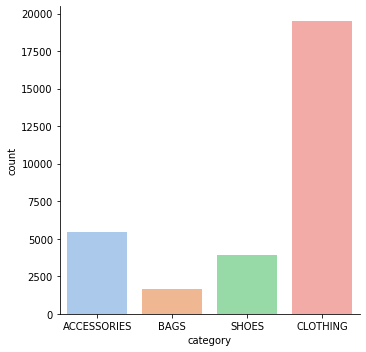

In [11]:
sns.catplot(x='category', kind='count', palette="pastel", data=all_products_df);

Clothing dominates other categories with the most number of products with 19,500 products.

In [12]:
from collections import Counter

Counter(all_products_df['category'])

Counter({'ACCESSORIES': 5424, 'BAGS': 1669, 'SHOES': 3913, 'CLOTHING': 19500})

In [13]:
subcat_counter = Counter(all_products_df['sub-category'])

In [14]:
top5_subcat = dict(Counter(subcat_counter).most_common(5))

print(top5_subcat)

{'T-Shirt': 3445, 'Sneakers': 2498, 'Jacket': 2302, 'Shirt': 2012, 'Trousers': 1776}


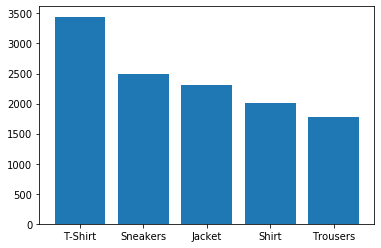

In [15]:
plt.bar(range(len(top5_subcat)), list(top5_subcat.values()), align='center')
plt.xticks(range(len(top5_subcat)), list(top5_subcat.keys()))

plt.show()

Most common items are T-shirt, then Sneakers and Jackets.

In [16]:
bottom5_subcat_name = sorted(subcat_counter, key=subcat_counter.get, reverse=False)[:5]
bottom5_subcat = dict()

for i in bottom5_subcat_name:
    bottom5_subcat[i] = subcat_counter[i]

print(bottom5_subcat)

{'Rings': 1, 'Slot': 1, 'Kneepads': 1, 'Sunglassses': 1, 'Pads': 1}


Least common five items are Rings, Kneepads, and 'Sunglassses'. One thing to note is that some of these least common items have names that contain typos such as 'Sunglassses' with 3 s's.

In [17]:
def top5(column):
    counter = Counter(column)
    
    return dict(Counter(counter).most_common(5))

In [18]:
def bottom5(column):
    counter = Counter(column)
    
    bottom5_name = sorted(counter, key=counter.get, reverse=False)[:5]
    
    bottom5 = dict()
    
    
    for i in bottom5_name:
        bottom5[i] = counter[i]
    
    return bottom5

In [19]:
top5_brand = top5(all_products_df['brand'])

print(top5_brand)

{'Gucci': 1288, 'Off-White': 669, 'Givenchy': 629, 'Paul Smith': 557, 'Prada': 530}


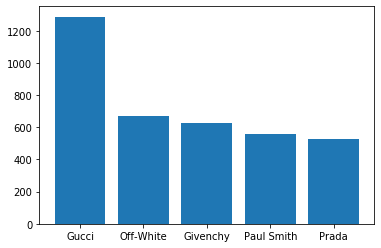

In [20]:
plt.bar(range(len(top5_brand)), list(top5_brand.values()), align='center')
plt.xticks(range(len(top5_brand)), list(top5_brand.keys()))

plt.show()

The most common brand is Gucci. With half of the number of products, Off-White comes second.

In [21]:
bottom5_brand = bottom5(all_products_df['brand'])

print(bottom5_brand)

{'Druthers': 1, 'NOR': 1, 'Uniform Wares': 1, 'Tumi': 1, 'H by Hudson': 1}


The least common brands seem unfamiliar except Tumi, which is surprising that the brand only has one product on SSENSE at the moment.

In [22]:
seperator = " "
brand_words = seperator.join(all_products_df['brand'])

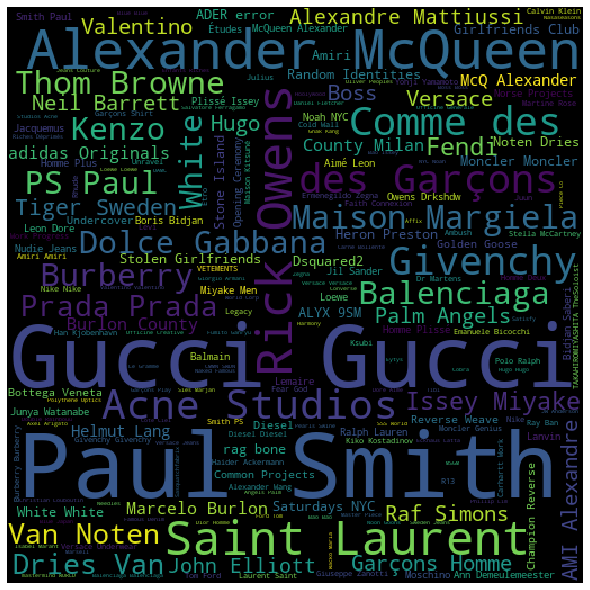

In [23]:
brand_wc = WordCloud(width = 512,height = 512).generate(brand_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(brand_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Let's look at price and check if there is any pattern with respect to price and brand or category.

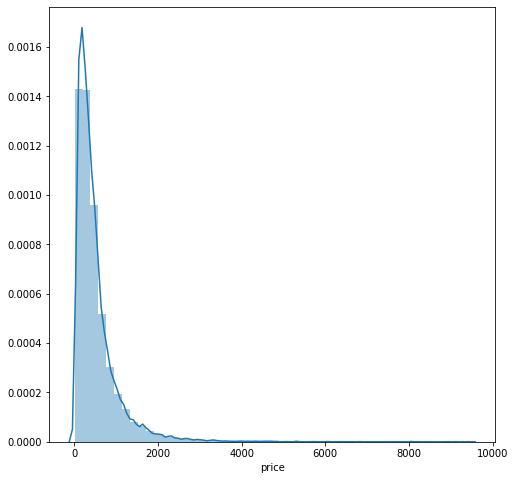

In [24]:
plt.figure(figsize=(8,8))

sns.distplot(all_products_df['price']);

Distribution for all prices seems to be rightly skewed with very very long right tail. It seems that no particular price accounts for even 0.02% overall. Let's classify these price into price range to see if we will get better resutls.

In [25]:
all_products_df['price_range'] = '0-50'

all_products_df.loc[all_products_df['price'] > 50, 'price_range'] = '51-100'
all_products_df.loc[all_products_df['price'] > 100, 'price_range'] = '101-250'
all_products_df.loc[all_products_df['price'] > 250, 'price_range'] = '251-500'
all_products_df.loc[all_products_df['price'] > 500, 'price_range'] = '501-1000'
all_products_df.loc[all_products_df['price'] > 1000, 'price_range'] = '1001-2500'
all_products_df.loc[all_products_df['price'] > 2500, 'price_range'] = '2500-5000'
all_products_df.loc[all_products_df['price'] > 5000, 'price_range'] = '5000+'

In [26]:
all_products_df['price_range'].value_counts().index

Index(['251-500', '101-250', '501-1000', '1001-2500', '51-100', '0-50',
       '2500-5000', '5000+'],
      dtype='object')

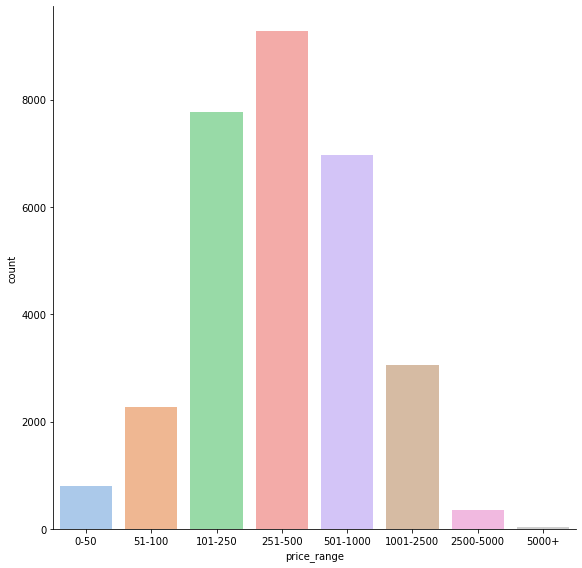

In [27]:
sns.catplot(x='price_range', kind='count', palette="pastel", data=all_products_df, height = 8, order= ['0-50','51-100', 
                                                                                                    '101-250', '251-500',
                                                                                                    '501-1000','1001-2500',
                                                                                                    '2500-5000', '5000+']);

With price range, the distribution now looks less skewed and more centered.

In [28]:
all_products_df[all_products_df['price'] == max(all_products_df['price'])][['category', 'sub-category', 'brand', 
                                                                            'name', 'price','currency']]

,category,sub-category,brand,name,price,currency
22722,CLOTHING,Jacket,Gucci,Blue Banana Bomber Jacket,9450,CAD


(656, 1412)


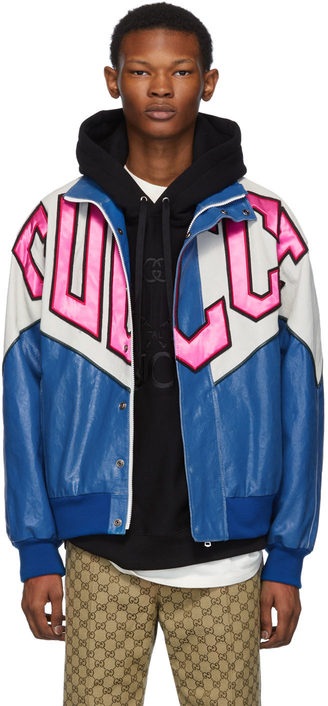

In [29]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(all_products_df[all_products_df['price'] == max(all_products_df['price'])]['image'].values[0])
img = Image.open(BytesIO(response.content))

print(img.size)

img = img.resize((328, 706), Image.ANTIALIAS)

img

Max price currently selling on SSENSE is $9,450 and belongs to Gucci Blue Banana Bomber Jacket.

In [30]:
all_products_df[all_products_df['price'] == min(all_products_df['price'])][['category', 'sub-category', 'brand', 
                                                                            'name', 'price','currency']]

,category,sub-category,brand,name,price,currency
2131,ACCESSORIES,Socks,Hugo,Two-Pack Black Logo Socks,10,CAD
2693,ACCESSORIES,Socks,Hugo,Two-Pack White Logo Socks,10,CAD
2954,ACCESSORIES,Socks,Hugo,Two-Pack White & Red Reverse Logo Socks,10,CAD


(856, 963)


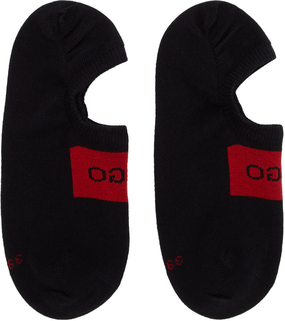

In [31]:
response = requests.get(all_products_df[all_products_df['price'] == min(all_products_df['price'])]['image'].values[0])
img = Image.open(BytesIO(response.content))

print(img.size)

img = img.resize((285, 321), Image.ANTIALIAS)

img

One of the cheapest items on SSENSE currently are Hugo Boss socks for $10.

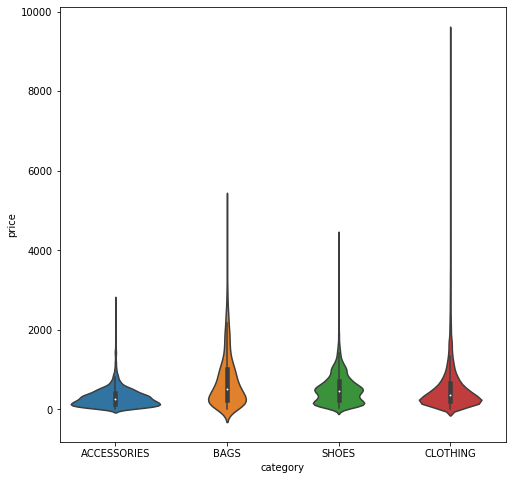

In [32]:
plt.figure(figsize=(8,8))

sns.violinplot(x=all_products_df['category'], y=all_products_df['price']);

Clothing price distribution is most rightly sknewed. All categories have narrow tails for price distribution except Bags have a bit larger right tail.

Now let's look at the description.

In [33]:
all_products_df['description'][9]

'Rigid iPhone XS case in black. White text and logo and blue logo graphic printed at face. Approx. 3" length x 6" height.\r\n\r\nSupplier color: Black/Multicolor'

To condcuct NLP analysis on the description, we first need to take care of formatting, stopwords (i.e. words that are most common, articles, etc.) and tokensize the description strings.

In [34]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def filter_txt(token): #remove words, characters that are stopwords, is a punctuation and 2 or fewer character long
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

  
def clean_txt(text): #more cleaning, lemmatization,
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\r|\n|-)+"," ",text) 
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if filter_txt(word)]
    clean_text2 = [word for word in clean_text if filter_txt(word)]
    return " ".join(clean_text2)

In [35]:
all_products_df['description'] = all_products_df['description'].apply(clean_txt)

In [36]:
all_products_df['description'][0]

'wool mohair blend beanie blue black white intarsia graphics knit throughout tassels side part william morgan capsule collection supplier color blue'

In [37]:
product_words = seperator.join([str(i) for i in list(all_products_df['description'])])

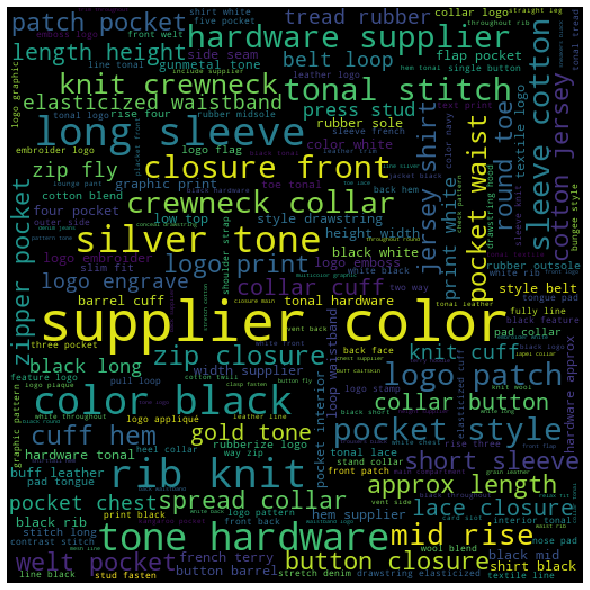

In [38]:
product_wc = WordCloud(width = 512,height = 512).generate(product_words)
plt.figure(figsize = (10, 8), facecolor = 'w')
plt.imshow(product_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Words that are most common in the description include logo print, tonal stitch, lace closure, tonal hardware. This will help with similar product recommendation.

In [39]:
all_products_df.head()

,productID,SKU,category,sub-category,brand,name,description,price,currency,url,image,price_range
0,4607571,201677M138033,ACCESSORIES,Beanie,Loewe,Blue William De Morgan Edition Dragon Beanie,wool mohair blend beanie blue black white inta...,1500,CAD,/men/product/loewe/blue-william-de-morgan-edit...,https://res.cloudinary.com/ssenseweb/image/upl...,1001-2500
1,4534861,201607M131237,ACCESSORIES,Belt,Off-White,Black Mini Industrial Belt,nylon blend web belt black tonal weave logo pa...,240,CAD,/men/product/off-white/black-mini-industrial-b...,https://res.cloudinary.com/ssenseweb/image/upl...,101-250
2,4534071,201607M164199,ACCESSORIES,Wallet,Off-White,Black Quote Yen Wallet,buff leather wallet black text print white fac...,400,CAD,/men/product/off-white/black-quote-yen-wallet/...,https://res.cloudinary.com/ssenseweb/image/upl...,251-500
3,4534221,201607M149208,ACCESSORIES,Holder,Off-White,Black Quote Card Holder,buff leather card holder black tonal burnish e...,265,CAD,/men/product/off-white/black-quote-card-holder...,https://res.cloudinary.com/ssenseweb/image/upl...,251-500
4,4534051,201607M162200,ACCESSORIES,Holder,Off-White,Black Quote Passport Holder,buff leather passport holder black text print ...,335,CAD,/men/product/off-white/black-quote-passport-ho...,https://res.cloudinary.com/ssenseweb/image/upl...,251-500


Finally, in order to build a recommendation system, another dataframe with only relevant info is need.

In [43]:
product_learning_df = all_products_df[['category', 'sub-category', 'brand', 'name','description','price','price_range','image']]

product_learning_df.head()

,category,sub-category,brand,name,description,price,price_range,image
0,ACCESSORIES,Beanie,Loewe,Blue William De Morgan Edition Dragon Beanie,wool mohair blend beanie blue black white inta...,1500,1001-2500,https://res.cloudinary.com/ssenseweb/image/upl...
1,ACCESSORIES,Belt,Off-White,Black Mini Industrial Belt,nylon blend web belt black tonal weave logo pa...,240,101-250,https://res.cloudinary.com/ssenseweb/image/upl...
2,ACCESSORIES,Wallet,Off-White,Black Quote Yen Wallet,buff leather wallet black text print white fac...,400,251-500,https://res.cloudinary.com/ssenseweb/image/upl...
3,ACCESSORIES,Holder,Off-White,Black Quote Card Holder,buff leather card holder black tonal burnish e...,265,251-500,https://res.cloudinary.com/ssenseweb/image/upl...
4,ACCESSORIES,Holder,Off-White,Black Quote Passport Holder,buff leather passport holder black text print ...,335,251-500,https://res.cloudinary.com/ssenseweb/image/upl...


In [44]:
pickle_out = open("product_learning_df_12042019.pickle","wb")
pickle.dump(product_learning_df,pickle_out)
pickle_out.close()